-------------------------------

# PhAst Algorithm (Part 3 of 5)

# Undertaking Photometry to Measure the Absolute Magnitude and Size of Asteroids

## By Arushi Nath

---------------------------------

#### This Third Notebook will take you through the steps of applying the comparison star offsets to your asteroid. It will allow you to create light curves of the asteroid, which will later be usefull in determining the physical properties of the asteroid.

-------------------------------

### 1. Calculating Comparison Star Offsets for Each Image 

In [77]:
### Finding the Difference Between the True and Computed Magnitude for all Comparison Stars in each Image ###
of = []
offset = []
for i in range(len(comp_instrument_mag[0])):
    for n in range(len(comp_instrument_mag)):
        of.append(comp_instrument_mag[n][i] - comp_stars_catalog2[n])
    offset.append(np.mean(of))
    of = []

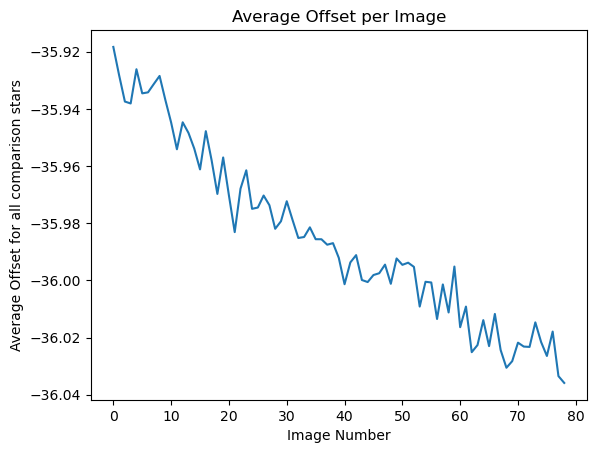

In [78]:
### Plotting the Average Offset per Image ###
plt.plot(offset)
plt.title("Average Offset per Image")
plt.xlabel("Image Number")
plt.ylabel("Average Offset for all comparison stars")
plt.show()

# 

  0%|          | 0/79 [00:00<?, ?it/s]

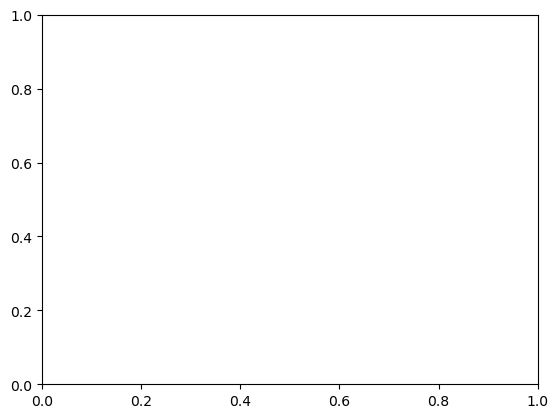

In [79]:
### Now that We Know the Offsets for Each Image, we First need to Find the Pixel Brightness of Didymos ###

Total_Brightness_Didymos = []
Brightness_Didymos = []
Didymos_single = []

X_axis = []

for img in tqdm(range(len(images))):
    centroids_ast = np.array(find_complete_star(images[img], didymos_x, didymos_y))
    X_axis = []
    
    ap = ast_aperture
    
    NEW_IMAGE = images[img]#[390:440, 190:350]

    coord_edit_ast = []
    coord_edit_ast.append(centroids_ast[img])

    data = NEW_IMAGE
    norm_ast = simple_norm(data, 'sqrt', percent=99)

    positions_ast = [x for x in coord_edit_ast if 'nan' not in str(x)]
    
    aperture_ast = CircularAperture(positions_ast, r=ap)
    annulus_aperture_ast = CircularAnnulus(positions_ast, r_in=ap+8, r_out=ap+12)
        
        #plt.imshow(images[img],cmap='gray', vmin=image_data.mean()-1*image_data.std(), vmax=image_data.mean()+1*image_data.std(), interpolation='nearest')
        #plt.show()
        
    ap_patches = aperture_ast.plot(color='white', lw=2)
    ann_patches = annulus_aperture_ast.plot(color='red', lw=2)


        
    aperstats = ApertureStats(data, annulus_aperture_ast)
    bkg_mean = aperstats.mean
     

        
    phot_table = aperture_photometry(data, aperture_ast)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output


    aperture_area = aperture_ast.area_overlap(data)


    total_bkg = bkg_mean * aperture_area
    
        
    
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg
    
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
      #  print(phot_table)
    
     
    for i in phot_table:
        Didymos_single.append(i[5])
       # print(star_single)    
    Total_Brightness_Didymos.append(Didymos_single)
    Didymos_single = []


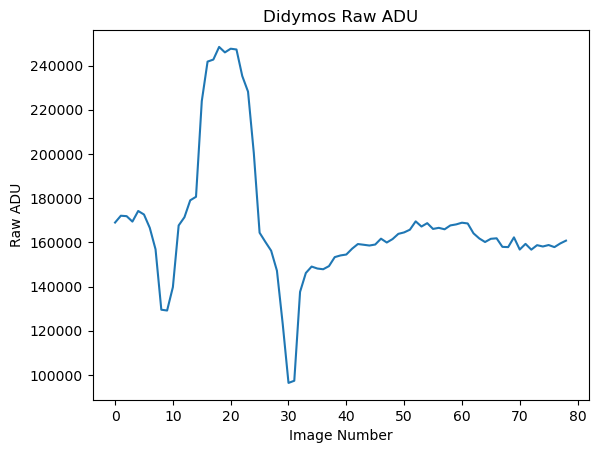

In [80]:
### Plotting Didymos Raw Pixel Brightness ###
plt.plot(Total_Brightness_Didymos)
plt.title("Didymos Raw Pixel Brightness")
plt.xlabel("Image Number")
plt.ylabel("Raw ADU")
plt.show()

In [81]:
### Turning Didymos Pixel Brightness into Instrument Magnitude for Each Image ###
IM = []
didymos_instrument_mag = []
for l in range(len(Total_Brightness_Didymos)):  
    didymos_instrument_mag.append(-2.5*np.log(Total_Brightness_Didymos[l][0]/60))

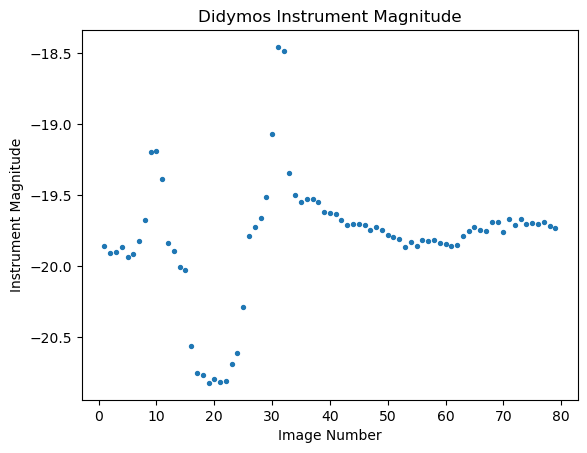

In [82]:
### Plotting Didymos Instrument Magnitude ###
plt.scatter(Star_X, didymos_instrument_mag, s = 8)
plt.title("Didymos Instrument Magnitude")
plt.xlabel("Image Number")
plt.ylabel("Instrument Magnitude")
plt.show()

In [83]:
### Finding Didymos True Magnitude using Comparison Star Offsets ###
Didymos_Magnitude = []
for i in range(len(didymos_instrument_mag)):
    Didymos_Magnitude.append(didymos_instrument_mag[i]-offset[i])

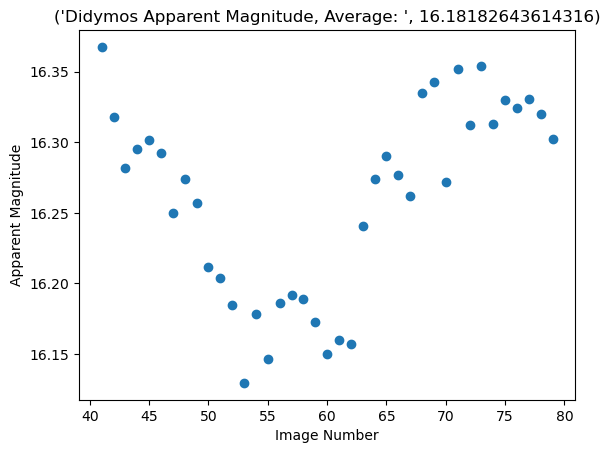

In [84]:
### Plotting Didymos True Magnitude across all Images ###
plt.scatter(Star_X, Didymos_Magnitude)
title = "Didymos Apparent Magnitude, Average: ", np.mean(Didymos_Magnitude)
plt.title(title)
plt.xlabel("Image Number")
plt.ylabel("Apparent Magnitude")
plt.show()